In [18]:
#import important libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from scipy import stats
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing

In [19]:
#read dataset csv file.
df = pd.read_csv('bike_sharing.csv')

In [20]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [21]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [22]:
# Take wanted columns
df = df.drop(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'atemp', 'hum', 'windspeed',
       'casual', 'registered'], axis=1)

In [23]:
df.head()

,temp,cnt
0,0.24,16
1,0.22,40
2,0.22,32
3,0.24,13
4,0.24,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 2 columns):
temp    17379 non-null float64
cnt     17379 non-null int64
dtypes: float64(1), int64(1)
memory usage: 271.6 KB


In [25]:
df.describe()

,temp,cnt
count,17379.000000,17379.000000
mean,0.496987,189.463088
std,0.192556,181.387599
min,0.020000,1.000000
25%,0.340000,40.000000
50%,0.500000,142.000000
75%,0.660000,281.000000
max,1.000000,977.000000


In [26]:
df.isna().sum()

temp    0
cnt     0
dtype: int64

In [27]:
df.isnull().sum()

temp    0
cnt     0
dtype: int64

In [28]:
# Replace the nan values with median of column 'y'
df['temp'] = df['temp'].replace(0, np.NaN)

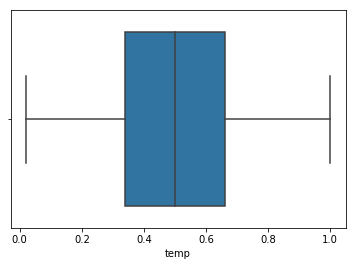

In [29]:
# Boxplot to find the outliers in the Temp column
sns.boxplot(df['temp'])

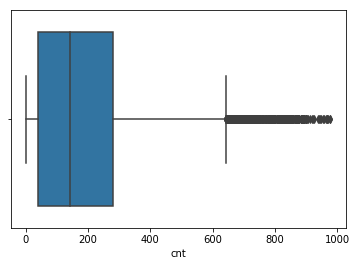

In [30]:
# Boxplot to find the outliers in the Temp column
sns.boxplot(df['cnt'])

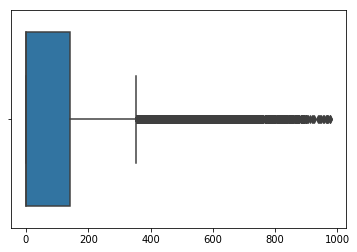

In [31]:
# Boxplot to find the outliers in the Temp column
sns.boxplot(df)

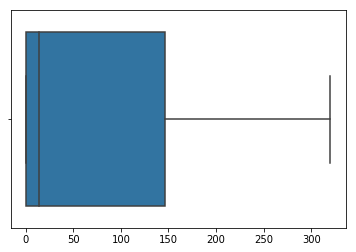

In [32]:
# Remove the outlier from the whole dataset
def remove_outlier(df):
    low = .20
    high = .80
    quant_df = df.quantile([low, high])
    for name in list(df.columns):
        if is_numeric_dtype(df[name]):
            df = df[(df[name] > quant_df.loc[low, name]) & (df[name] < quant_df.loc[high, name])]
    return df

df = remove_outlier(df)
sns.boxplot(df)

-0.6120633409261234 -0.6115944842561364
0.48574011299434217 0.48


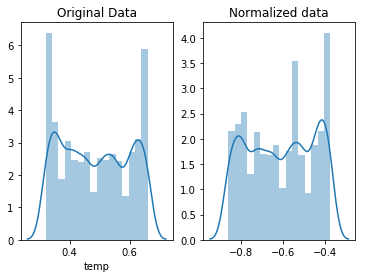

In [33]:
target = stats.boxcox(df['temp'])
# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(df['temp'], ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(target[0], ax=ax[1])
ax[1].set_title("Normalized data")
print(np.mean(target[0]), np.median(target[0]))
print(df['temp'].mean(), df['temp'].median())

24.54208713147803 25.020548569443335
152.38773204196934 146.0


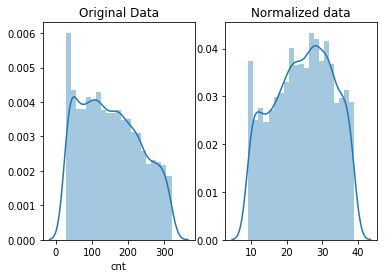

In [34]:
target1 = stats.boxcox(df['cnt'])
# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(df['cnt'], ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(target1[0], ax=ax[1])
ax[1].set_title("Normalized data")
print(np.mean(target1[0]), np.median(target1[0]))
print(df['cnt'].mean(), df['cnt'].median())

In [35]:
x_dataset = target[0].reshape((len(target1[0]), 1))
y_dataset = target1[0].reshape(len(target[0]), 1)

In [36]:
min_max_scaler = preprocessing.MinMaxScaler()
x_dataset = min_max_scaler.fit_transform(x_dataset)

In [38]:
#Using sklearn linear regression model
x_data_train, x_data_test, y_data_train, y_data_test = train_test_split(
        x_dataset, y_dataset, test_size=0.25, random_state=42)
model = LinearRegression()
reg = model.fit(x_data_train,y_data_train)
reg.score(x_data_test, y_data_test)
y_pred =  reg.predict(x_data_test)
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, accuracy_score

accuracy_test = mean_absolute_error(y_data_test,y_pred)

print("R2 score of test dataset", r2_score(y_data_test,y_pred), accuracy_test)

R2 score of test dataset 0.008470505871433387 7.093480754378632


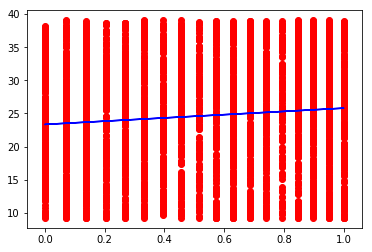

In [39]:
plt.scatter(x_data_train, y_data_train, color='red')
plt.plot(x_data_train, reg.predict(x_data_train), color='blue')
plt.show()

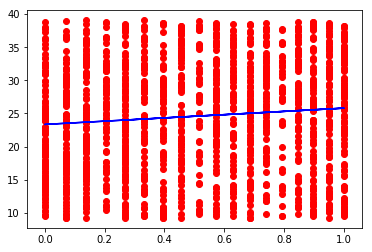

In [40]:
plt.scatter(x_data_test, y_data_test, color='red')
plt.plot(x_data_test, reg.predict(x_data_test), color='blue')
plt.show()